# Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
#from pprint import pprint
#import datetime

In [2]:
# read json as a dataframe
data = pd.read_json('logins.json')

#set login_time as index, and resample into different time intervals
data.set_index('login_time', inplace=True)
data['logins'] = 0
data_15 = data.resample('15Min').count()
data_hourly = data.resample('60Min').count()
data_daily = data.resample('D').count()

#print(data_hourly.head(24))

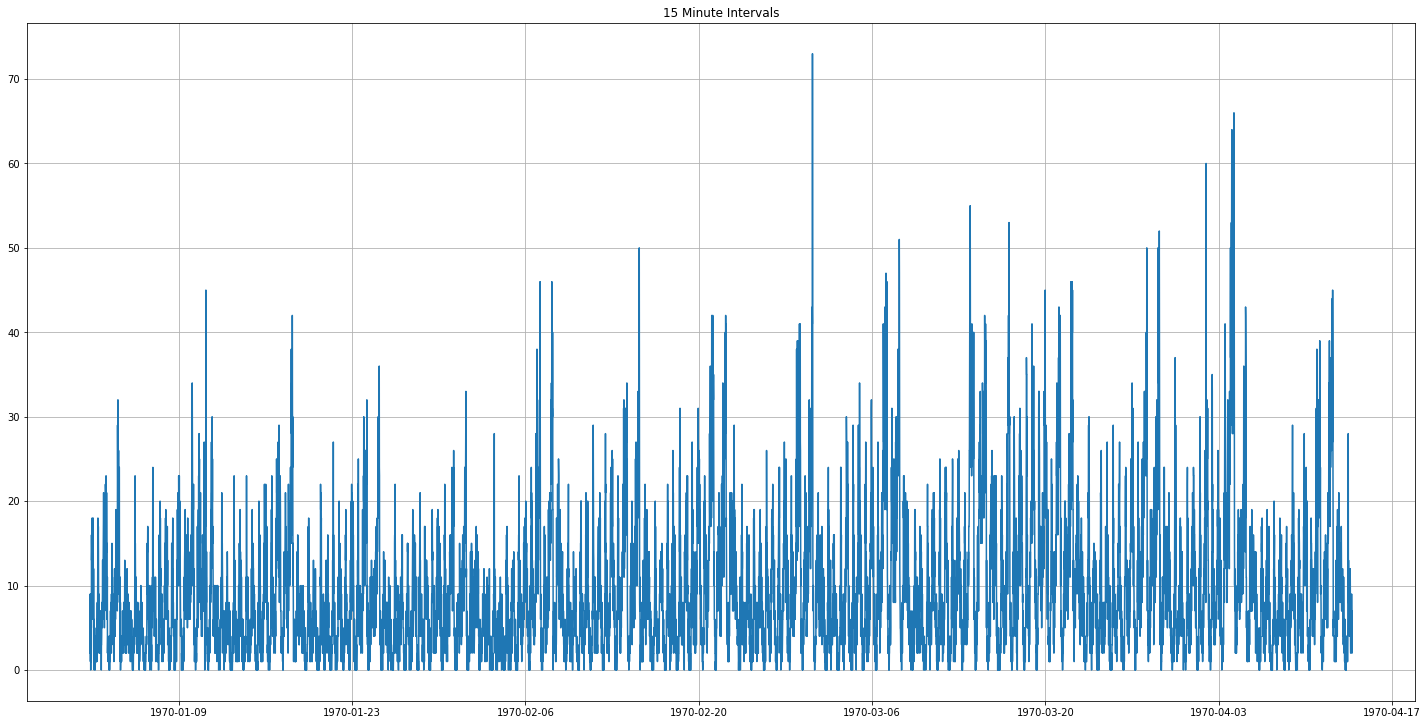

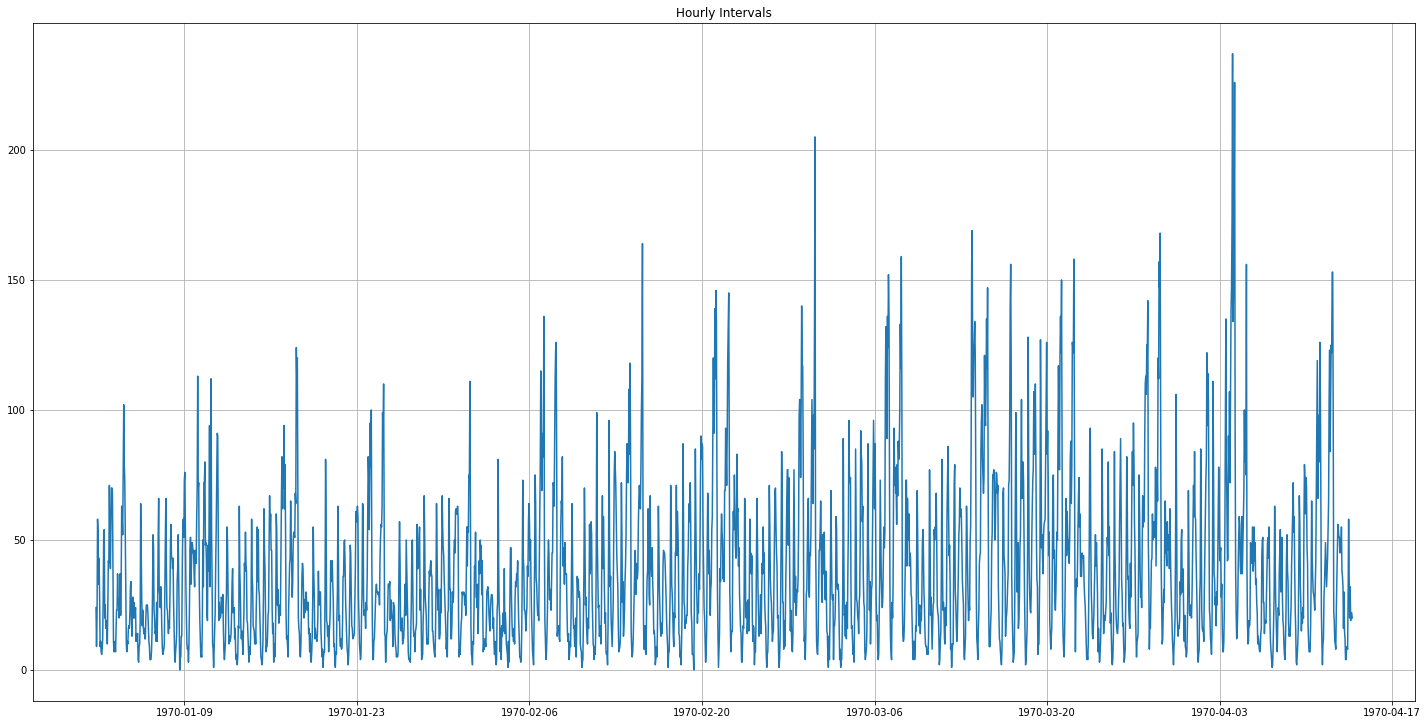

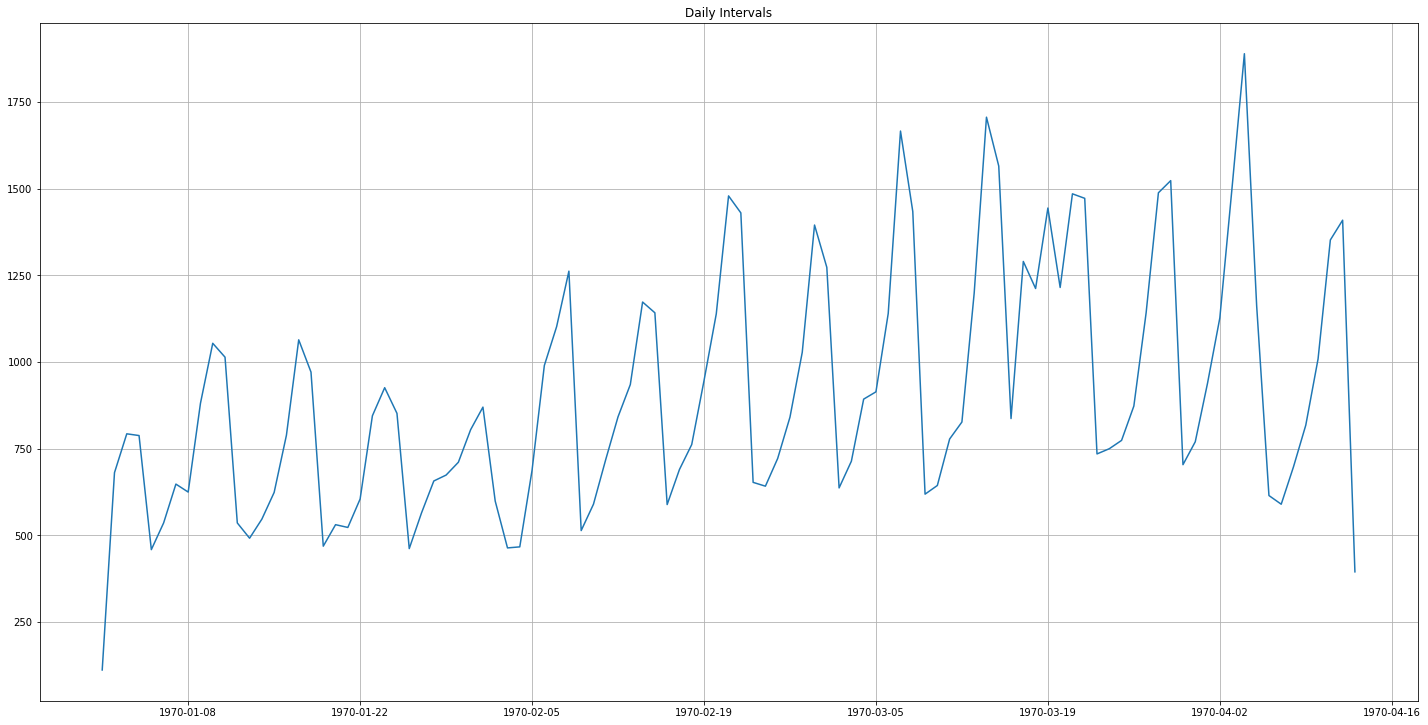

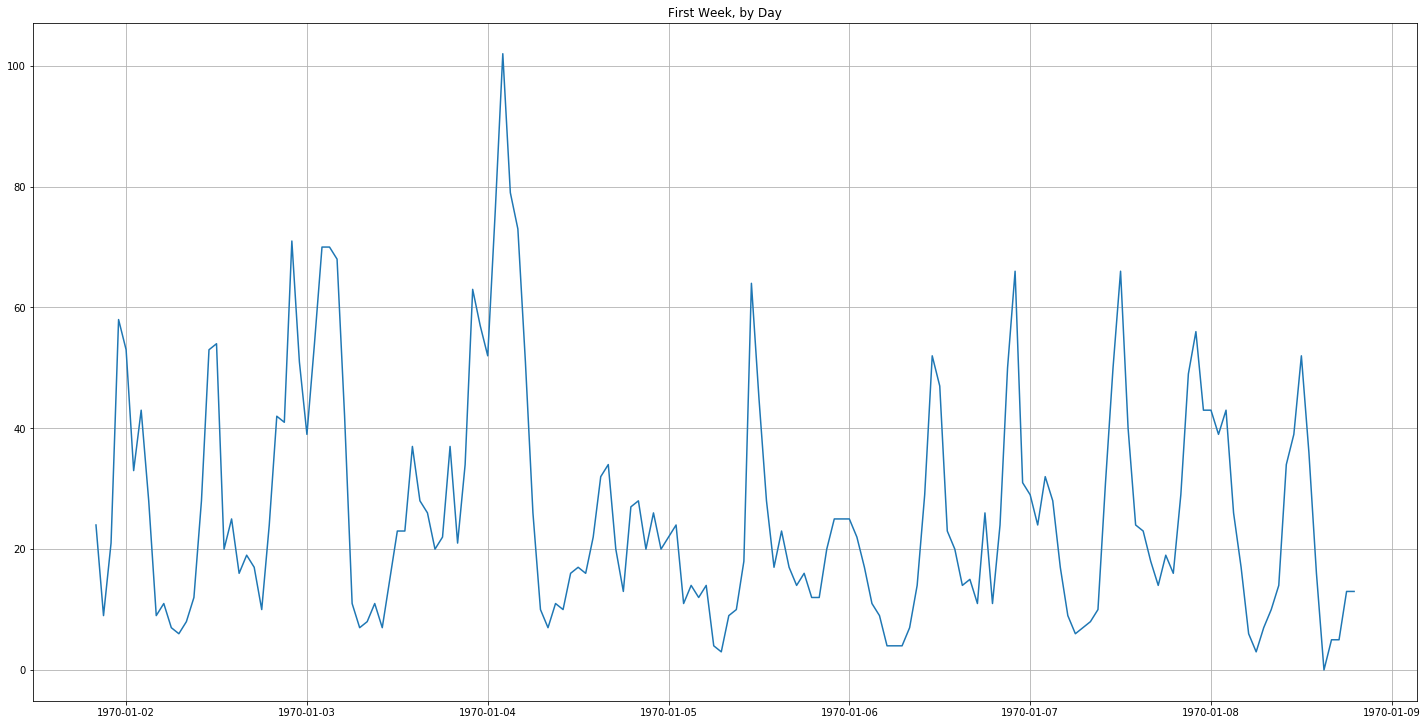

In [3]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# plot login data in all time intervals
plt.plot(data_15['logins'])
plt.tight_layout()
plt.title('15 Minute Intervals')
plt.grid()
plt.show()

plt.plot(data_hourly['logins'])
plt.tight_layout()
plt.title('Hourly Intervals')
plt.grid()
plt.show()

plt.plot(data_daily['logins'])
plt.tight_layout()
plt.title('Daily Intervals')
plt.grid()
plt.show()

plt.plot(data_hourly['logins'][:168])
plt.tight_layout()
plt.title('First Week, by Day')
plt.grid()
plt.show()

There is a general upward trend from January to mid-April.
The peak login times are near midnight and noon, or twice a day. 


# Part 2: Experiment and Metrics Design

Here are my initial hypothesis and assumption:

With a higher activity at night in Gotham and higher activity during the day in Metropolis during weekdays, one may think that people live in Gotham and work in Metropolis. Since both cities are reasonably active active on the weekends, one would think that people travel to the neighboring city for leisure or visit friends/family, to name a couple examples.

The experiment proposed by Ultimate managers of city operations is to encourage driver partners to be available in both cities by reimbursing all toll costs. 

1)  The metric I would choose as the key measure of success of this experiment is number of tolls reimbursed by Ultimate Inc. The number of tolls that were reimbursed suggest that the drivers were willing to cross the bridge because their tolls were paid for by the company. Simply choosing the number of tolls is not good enough because other drivers would be crossing the bridge and paying the toll as well during the time of the experiment. This is the comparison I will be using as the effectiveness of the experiment.

2)  The experiment will consist of two groups of drivers: a group who receives reimbursement for bridge tolls and drivers who do not receive reimbursement for bridge tolls. Null hypothesis: bridge toll reimbursement has no significant impact on driver activity in both cities.

a) Each driver receives a unique identifier, or have the bridge use the license plate as the primary key of the driver. The bridge also must keep records of drivers who cross the bridge so that Ultimate Inc. can use the data for this experiment. Assign half of the drivers to the control group, or the group who does not receive reimbursement for bridge tolls. The other half of the drivers are assigned to the treatment group and receive reimbursement. Have the drivers perform their normal duties throughout the timespan of the experiment (let's use one week) and then count the number of times each car crossed the bridge. Sum the number of times the cars crossed the bridge in their respective groups.
    
b) The statistical test I would focus on for this experiment is using permutation resampling to calculate a p-value that would identify if the reimbursement of bridge tolls is statistically significant in the increase in activity for drivers in both cities by crossing the bridge. I would need the means of both groups and then find the difference of means. With the difference of means I can then generate a set of permutation replicates to calculate the p-value for statistical significance. 
    
c) Based on the results, if we get a p-value that is greater than 0.05, we would fail to reject the null hypothesis that the reimbursement of bridge tolls has NO statistically significant impact on driver activity in both cities. Conversely, if p is less than 0.05, then we would reject the null hypothesis, which would therefore allude to the alternative hypothesis that there is a significant impact on driver activity in both cities with a bridge toll reimbursement for drivers. One of the caveats of this experiment is that we do not know if the bridge toll applies everyday or at certain times of the day. If we assume that the bridge toll applies 24/7, then another caveat would be the behavior of some drivers related to distance traveled. Some stingy drivers may not want to cross the bridge regardless. With a proper permutation sample, we can exclude this caveat from the experiment flaws. As a recommendation for Ultimate Inc. where the reimbursement improves driver activity in both cities, I would suggest providing all drivers with reimbursement of bridge tolls during peak hours of driver activity. Providing reimbursement 24/7 may not be the most cost-effective approach for the company, the city, or the drivers. 

# Part 3: Predictive Modeling

## 1. Data Cleaning, Transformation, and EDA

In [4]:
# another way of loading json file. read_json would not work
riders = json.load(open('ultimate_data_challenge.json'))
# convert to dataframe
riders = pd.DataFrame(riders)

#riders

In [5]:
sorted(riders.last_trip_date)[-1] 
# last day is 2014-07-01, so active users have a last_trip_date after 2014-06-01

'2014-07-01'

Since we are looking at rider retention, find the best predictors for retention. The last day in this dataset is 2014-07-01, so active users have a last_trip_date of at least 2014-06-01. Maybe count the number of trips, average of last rating the rider gave, or distance/weekday_pct as features that may lead to rider retention.

In [6]:
# add retained column if the user was active after 2014-06-01
riders['retained'] = [1 if date > '2014-06-01' else 0 for date in riders['last_trip_date']]

#riders

In [7]:
riders.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.36620
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.48177
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.00000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.00000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.00000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.00000


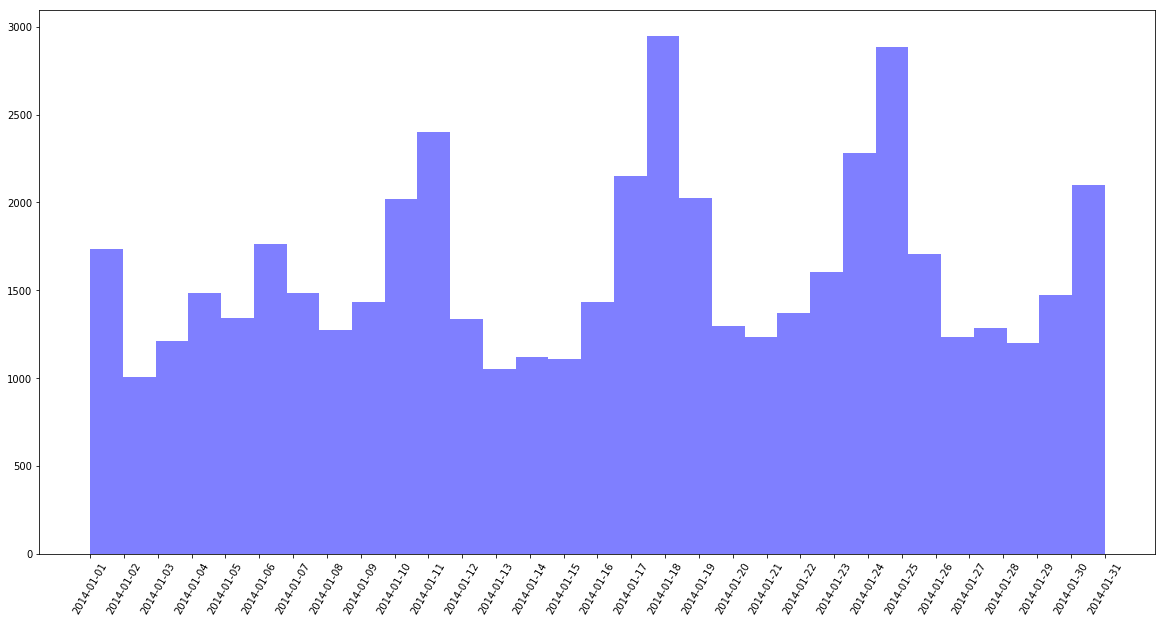

In [8]:
# visualize each day of signups (all took place first month)
plt.hist(riders['signup_date'], bins=31, alpha=0.5, color='b')
plt.xticks(rotation=60)

plt.show()

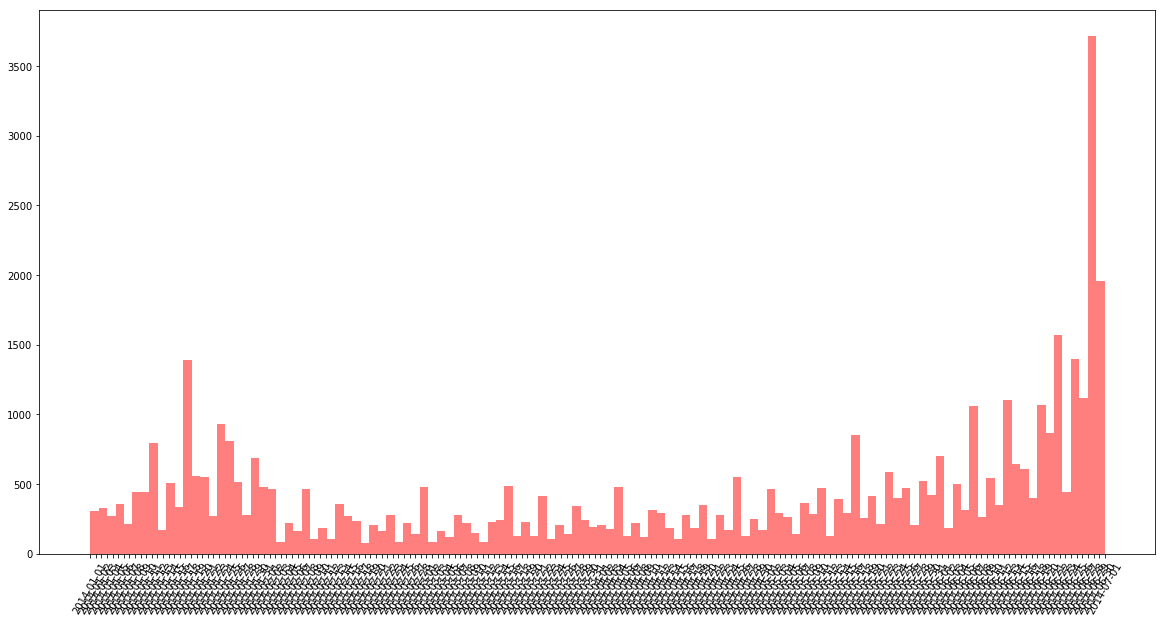

In [9]:
# visualize the last day of activity for users. 
plt.hist(riders['last_trip_date'], bins=120, alpha=0.5, color='r')
plt.xticks(rotation=60)
plt.show()

This visualization is not very helpful. However, with a long left tail, this leads us to thinking that there are fewer active 'retained' users than non-retained users.

In [10]:
# transform the text data to numerical data (city, phone, ultimate black user)
"""
riders = json.load(open('ultimate_data_challenge.json'))

riders = pd.DataFrame(riders)

riders['retained'] = [1 if date > '2014-06-01' else 0 for date in riders['last_trip_date']]
"""
# uncomment above if you need to reset dataframe

# map the cities to integers
dict_city = {"Astapor": 1, "King's Landing": 2, "Winterfell": 3}
riders['city'] = [dict_city[x] for x in riders['city']]

# map the phone types to integers
dict_phone = {"None": 0, "iPhone": 1, "Android": 2}
riders['phone'].fillna('None', inplace=True)
riders['phone'] = [dict_phone[i] for i in (riders['phone'])]

# map the boolean to integers
dict_ultimate_black_user = {"False": 0, "True": 1}
riders['ultimate_black_user'] = riders['ultimate_black_user'].astype('int')

# set NaN's to 0's
riders['avg_rating_of_driver'] = riders['avg_rating_of_driver'].fillna(0.0)

#riders

In [11]:
# split into two cohorts: retained and not retained

retained_riders = riders[riders['retained'] == 1]
non_retained_riders = riders[riders['retained'] == 0]

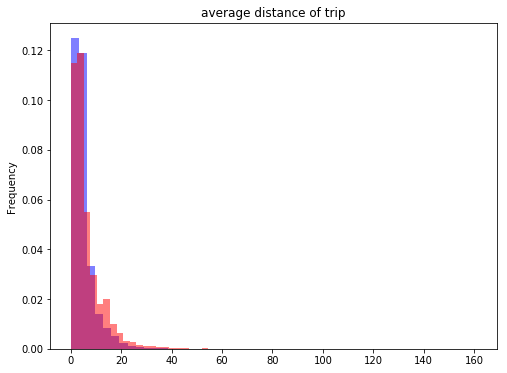

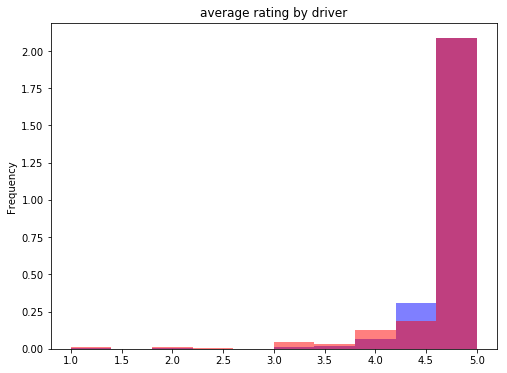

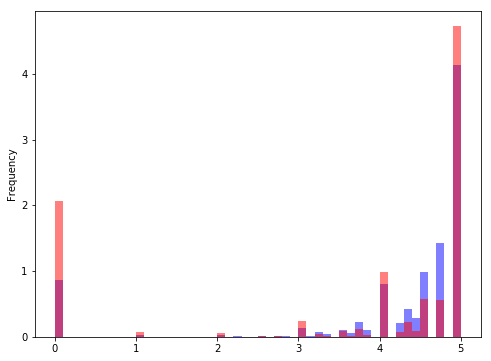

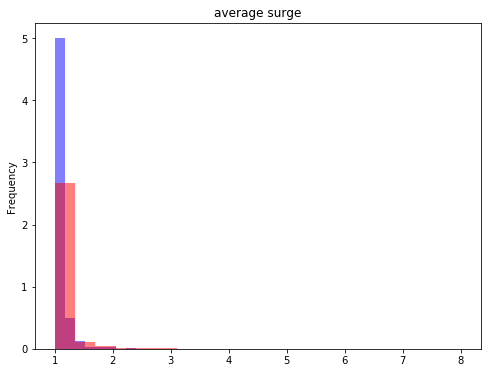

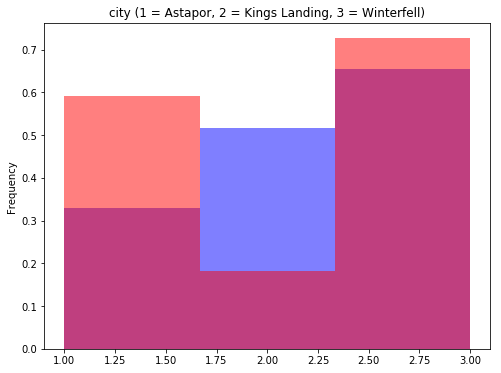

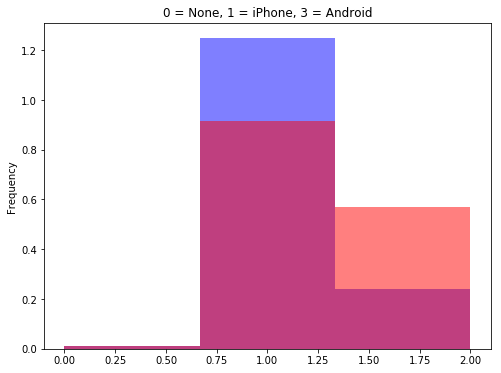

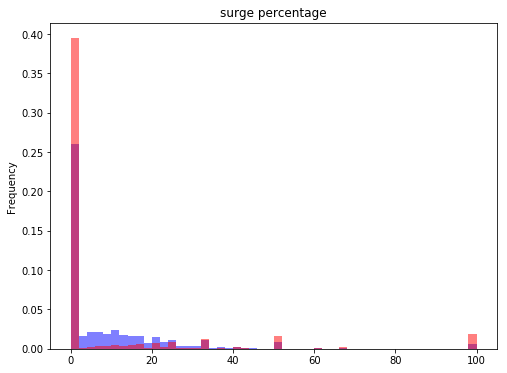

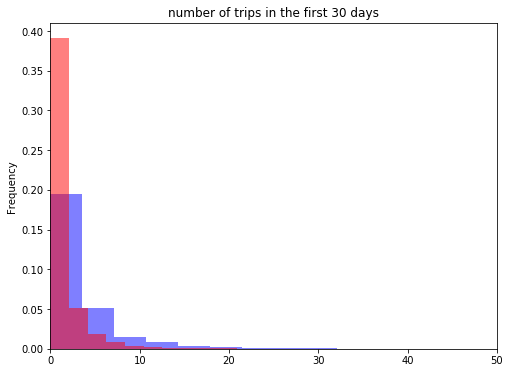

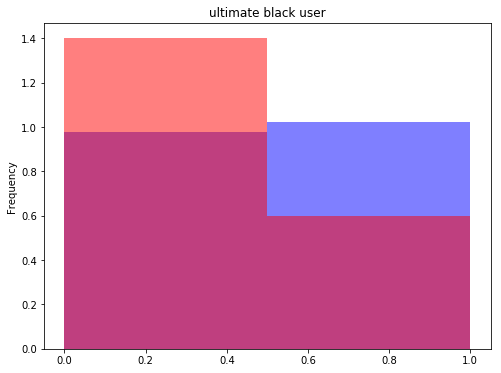

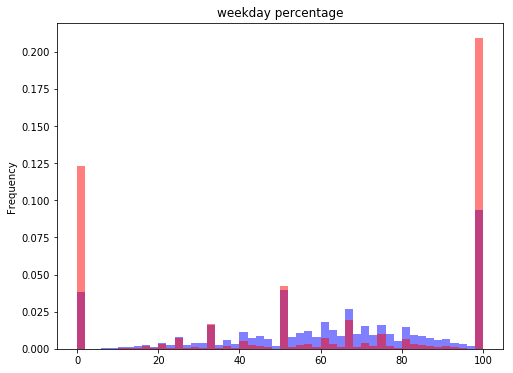

In [12]:
# histograms of each feature, split into retained/not retained overlaid, and shows normalized frequencies
# blue = retained; red = not retained

# retained users had shorter trips. non-retained had slightly longer trips.
retained_riders['avg_dist'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(8,6))
non_retained_riders['avg_dist'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(8,6))
plt.title('average distance of trip')
plt.show()

# retained rider driver ratings had a smaller left tail than non-retained riders.
# there were more bad reviews by drivers for non-retained riders.
retained_riders['avg_rating_by_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=10, color='b', figsize=(8,6))
non_retained_riders['avg_rating_by_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=10, color='r', figsize=(8,6))
plt.title('average rating by driver')
plt.show()

# non-retained riders gave both more 0 and 5 review ratings. 
retained_riders['avg_rating_of_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(8,6))
non_retained_riders['avg_rating_of_driver'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(8,6))
plt.show('average rating of driver')
plt.show()

# the surge was higher for non-retained riders
retained_riders['avg_surge'].plot(kind='hist', normed=True, alpha=0.5, bins=20, color='b', figsize=(8,6))
non_retained_riders['avg_surge'].plot(kind='hist', normed=True, alpha=0.5, bins=20, color='r', figsize=(8,6))
plt.title('average surge')
plt.show()

# kings landing had more retained users and astapor/winterfell had more non-retained users.
retained_riders['city'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='b', figsize=(8,6))
non_retained_riders['city'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='r', figsize=(8,6))
plt.title('city (1 = Astapor, 2 = Kings Landing, 3 = Winterfell)')
plt.show()

# iPhones with the strongest rider retention.
retained_riders['phone'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='b', figsize=(8,6))
non_retained_riders['phone'].plot(kind='hist', normed=True, alpha=0.5, bins=3, color='r', figsize=(8,6))
plt.title('0 = None, 1 = iPhone, 3 = Android')
plt.show()

# surge percentage was higher for retained users, most likely daily commuters.
retained_riders['surge_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(8,6))
non_retained_riders['surge_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(8,6))
plt.title('surge percentage')
plt.show()

# more non-retained users only took 1-2 trips in the first 30 days (then probably stopped riding after... one free ride)
retained_riders['trips_in_first_30_days'].plot(kind='hist', normed=True, alpha=0.5, bins=35, color='b', figsize=(8,6))
non_retained_riders['trips_in_first_30_days'].plot(kind='hist', normed=True, alpha=0.5, bins=35, color='r', figsize=(8,6))
plt.xlim(0,50)
plt.title('number of trips in the first 30 days')
plt.show()

# ultimate black user experience has a higher retention of riders
retained_riders['ultimate_black_user'].plot(kind='hist', normed=True, alpha=0.5, bins=2, color='b', figsize=(8,6))
non_retained_riders['ultimate_black_user'].plot(kind='hist', normed=True, alpha=0.5, bins=2, color='r', figsize=(8,6))
plt.title('ultimate black user')
plt.show()

# weekday percentage has riders in both groups with about the same spread on the histogram.
# non-retained users had higher extremes, however.
retained_riders['weekday_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='b', figsize=(8,6))
non_retained_riders['weekday_pct'].plot(kind='hist', normed=True, alpha=0.5, bins=50, color='r', figsize=(8,6))
plt.title('weekday percentage')
plt.show()

In [13]:
len(riders[riders['retained'] == 1]) / len(riders)

0.3662

The percentage of riders who are still active is 36.62%.

## 2. Predictive Model

In [14]:
# predictive modeling, went with logistic regression
# knn and decision tree performed about the same, but no .coef_ attribute.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

In [15]:
cols = ['last_trip_date', 'signup_date', 'retained']
X = riders.drop(cols, axis=1).fillna(0)
y = riders['retained']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
phone                     50000 non-null int64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
dtypes: float64(6), int32(1), int64(3)
memory usage: 3.6 MB


In [16]:
# split training and testing, create classifier, fit and predict classifer
X_train, X_test, y_train, y_test = train_test_split(X, y)
# clf = DecisionTreeClassifier() about 70% accurate, does not have .coef_
clf = LogisticRegression()
# clf = KNeighborsClassifier(n_neighbors=5)
y_pred = clf.fit(X_train, y_train).predict(X_test)

# confusion matrix, classification report, and accuracy score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred, y_test))
print('')

# print importances of each feature and the feature columns
print(clf.coef_[0])
print(list(X.columns.values))

[[6829 1121]
 [2623 1927]]
             precision    recall  f1-score   support

          0       0.72      0.86      0.78      7950
          1       0.63      0.42      0.51      4550

avg / total       0.69      0.70      0.68     12500

0.70048

[-0.02933768 -0.02701638  0.14324275 -0.40883423  0.20072517 -1.05124208
  0.00723918  0.10518092  0.87144382  0.00134066]
['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'phone', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']


In [17]:
# prints the sorted list of features by importance for the classifier
i = 0
features = []
for feature in X.columns.values:
    features.append((clf.coef_[0][i], feature))
    i += 1
    
sorted(features, reverse=True)

[(0.871443816667026, 'ultimate_black_user'),
 (0.20072516744098967, 'city'),
 (0.1432427526480867, 'avg_rating_of_driver'),
 (0.10518091540856912, 'trips_in_first_30_days'),
 (0.007239178159574837, 'surge_pct'),
 (0.0013406614711356714, 'weekday_pct'),
 (-0.02701638266020152, 'avg_rating_by_driver'),
 (-0.02933767747702938, 'avg_dist'),
 (-0.4088342317798115, 'avg_surge'),
 (-1.0512420807272145, 'phone')]

The sorted features above suggest which columns are most important for retaining users for 6+ months. The coefficient magnitudes are based on a regression equation. The ultimate_black_user sounds like more of a premium service. Users with the premium service are most likely daily/frequent riders. This is by far the most important feature. The next three features follow the most important feature: city, avg_rating_of_driver, and trips_in_30_days.

I tried the KNN and Decision Tree Classifier approaches, which perform about the same as logistic regression with an accuracy score of about 70%. I kept logistic regression because I could more easily find the top features. 

One concern I had was that phone had the most negative impact on rider retention. Users with Androids have lower rider retentions, which means there should be an update for Android platforms to be more user friendly or fix any bugs.

## 3. Insights for Ultimate Inc.

With ultimate_black_user as the most impacting feature for rider retention after 6 months, I think it may be wise to offer some sort of free trial or discounts to new users. It will encourage riders to use Ultimate more and hopefully continue the ultimate black user service. This both improves rider retention and revenue from subscriptions. One interesting option would be to offer special rewards or fun prizes/accolades for active users who use Ultimate multiple times a week.

Another insight for Ultimate would be to improve the Android user experience since the iPhone users have a higher retention than Android users.

The model predicts with about 70% accuracy, which can be useful. I think another approach would be to try a support vector machine algorithm on the dataset. 